In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **upload the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving final_updated_shopping_trends.csv to final_updated_shopping_trends.csv


# **Load the dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('final_updated_shopping_trends.csv')


# **Data Exploration**

In [ ]:
# read the dataset
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [ ]:
# shaoe of the dataset
print("shape:",df.shape)

shape: (200, 20)


In [ ]:
#colunm names
print("columns:",df.columns)

columns: Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Date'],
      dtype='object')


In [ ]:
#Data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               200 non-null    int64  
 1   Age                       200 non-null    int64  
 2   Gender                    200 non-null    object 
 3   Item Purchased            200 non-null    object 
 4   Category                  200 non-null    object 
 5   Purchase Amount (USD)     200 non-null    int64  
 6   Location                  200 non-null    object 
 7   Size                      200 non-null    object 
 8   Color                     200 non-null    object 
 9   Season                    200 non-null    object 
 10  Review Rating             200 non-null    float64
 11  Subscription Status       200 non-null    object 
 12  Payment Method            200 non-null    object 
 13  Shipping Type             200 non-null    object 
 14  Discount A

In [ ]:
# Summary statistics for numeric features
print(df.describe())

       Customer ID         Age  Purchase Amount (USD)  Review Rating  \
count   200.000000  200.000000             200.000000     200.000000   
mean    100.500000   44.230000              59.790000       3.806500   
std      57.879185   14.854981              24.054292       0.721534   
min       1.000000   18.000000              20.000000       2.500000   
25%      50.750000   31.750000              37.000000       3.100000   
50%     100.500000   45.500000              59.500000       3.900000   
75%     150.250000   56.000000              81.000000       4.500000   
max     200.000000   70.000000             100.000000       5.000000   

       Previous Purchases  
count          200.000000  
mean            28.005000  
std             14.622382  
min              1.000000  
25%             15.750000  
50%             30.000000  
75%             41.250000  
max             50.000000  


# **Check for Missing Values and Duplicates**

In [ ]:
# Check for missing values
print(df.isnull().sum())

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
Date                        0
dtype: int64


In [ ]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


# **Visualization**

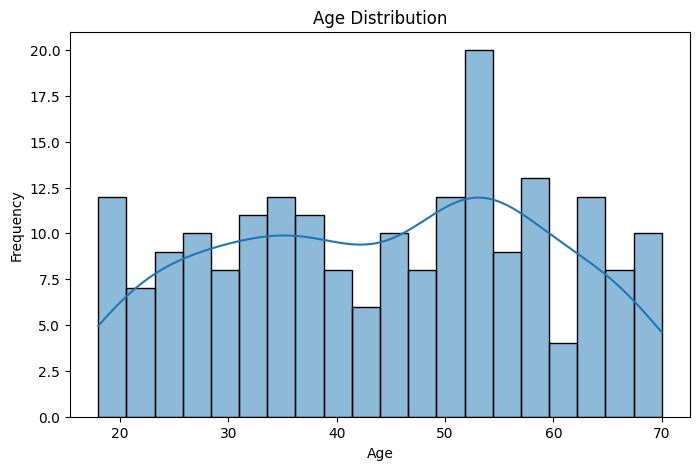

In [ ]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

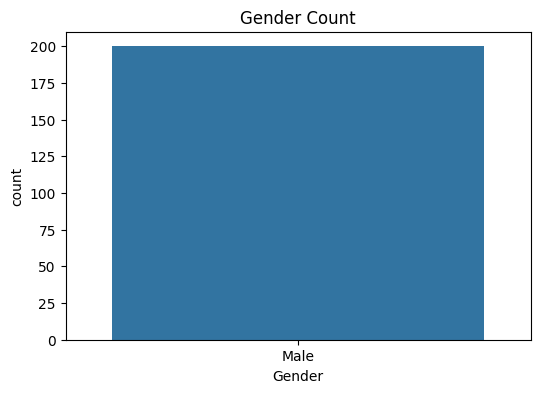

In [ ]:
# Gender Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Count')
plt.show()

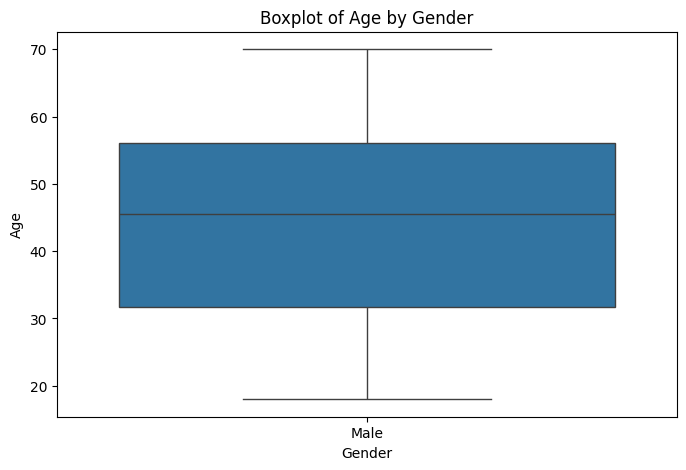

In [ ]:
# age by gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Boxplot of Age by Gender')
plt.show()


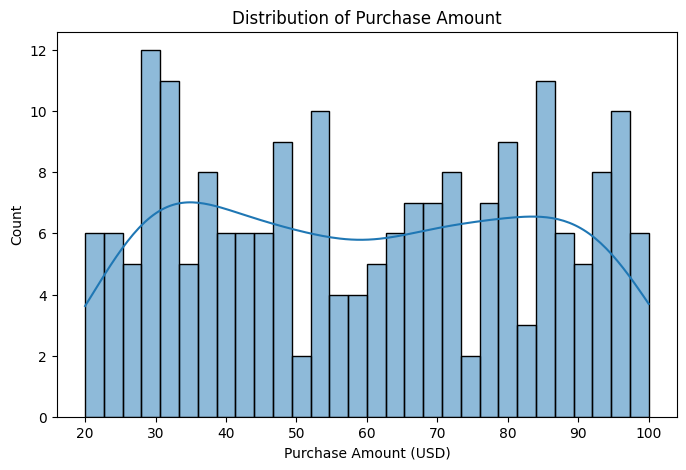

In [ ]:
#Purchase Amount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.show()

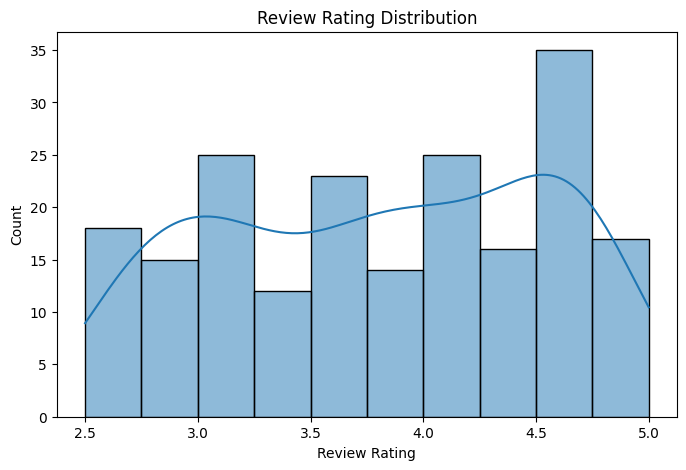

In [ ]:
# Review Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Review Rating'], bins=10, kde=True)
plt.title('Review Rating Distribution')
plt.xlabel('Review Rating')
plt.show()

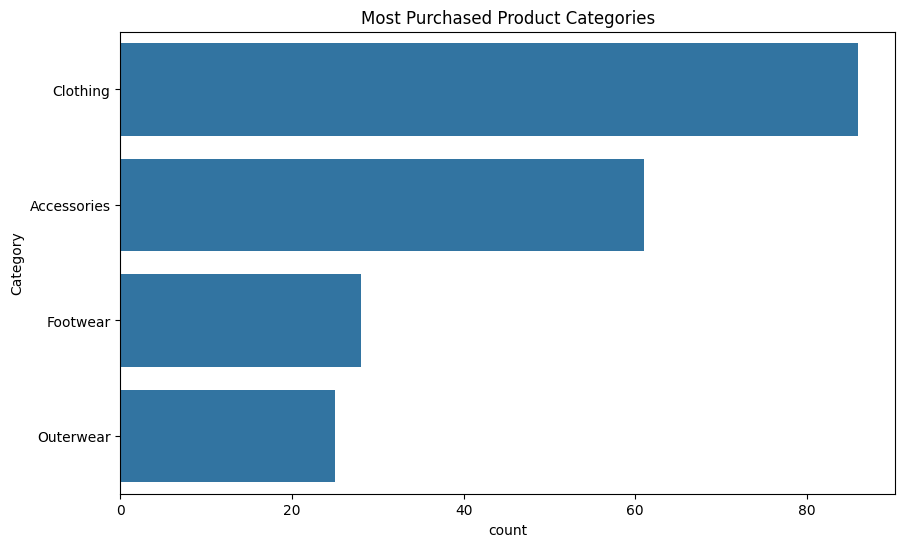

In [ ]:
# Popular Categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Most Purchased Product Categories')
plt.show()

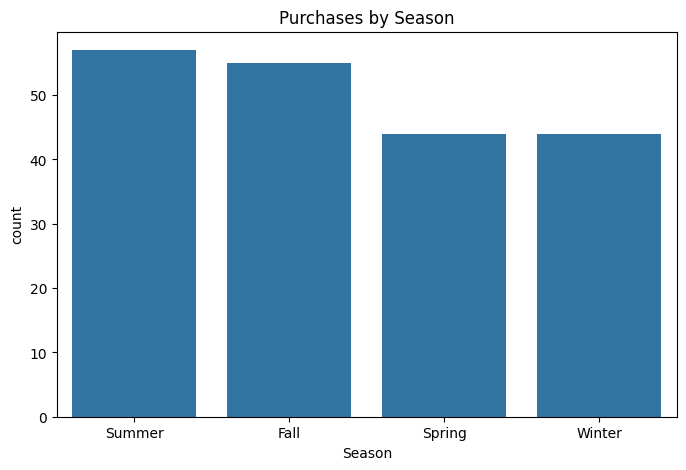

In [ ]:
# Seasonal Trends
plt.figure(figsize=(8, 5))
sns.countplot(x='Season', data=df, order=df['Season'].value_counts().index)
plt.title('Purchases by Season')
plt.show()


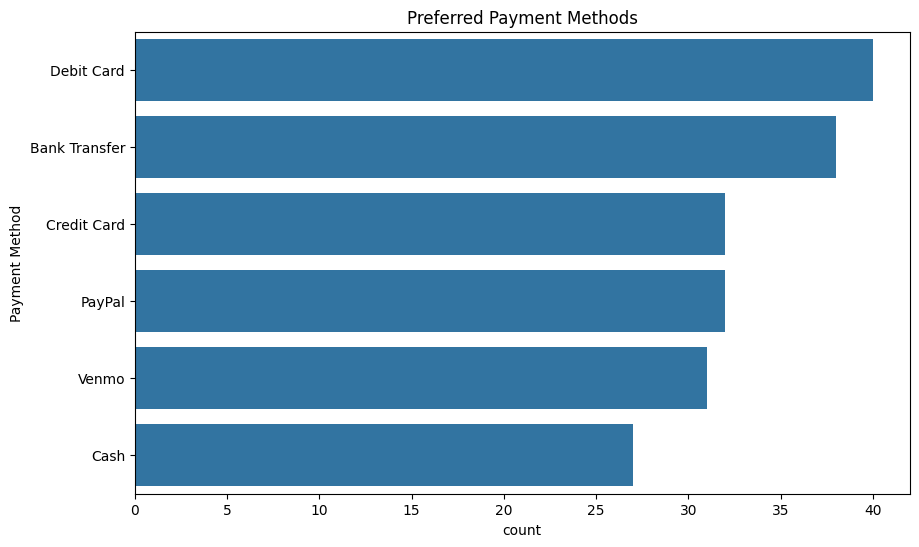

In [ ]:
# Payment Method Preference
plt.figure(figsize=(10, 6))
sns.countplot(y='Payment Method', data=df, order=df['Payment Method'].value_counts().index)
plt.title('Preferred Payment Methods')
plt.show()


# **Identify Target and Features**

In [ ]:
target = 'Purchase Amount (USD)'
features = df.columns.drop(target)
print("Features:", features)

Features: Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases', 'Date'],
      dtype='object')


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases', 'Date']


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)